<a href="https://colab.research.google.com/github/Rahulchunduruu/Machine-Learning/blob/main/cats_and_dogs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.models import Sequential
from PIL import Image,ImageOps
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
#mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
train_data_cat='/content/drive/MyDrive/new_data_sets/training_set/training_set/cats'
train_data_dog='/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs'
test_data_cat='/content/drive/MyDrive/new_data_sets/archive/test/cats/'
test_data_dog='/content/drive/MyDrive/new_data_sets/archive/test/dogs/'

In [49]:
#creating a label
total_cats_count=[0]*(len(os.listdir(train_data_cat)))
total_dogs_count=[1]*(len(os.listdir(train_data_dog)))
label_data_cat=total_cats_count
label_data_dog=total_dogs_count

In [50]:
#label created and checking how many no cats/dogs label count
label_data_cat.count(0)
label_data_dog.count(1)

4006

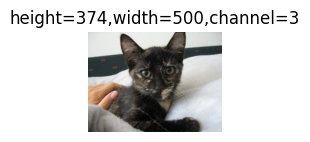

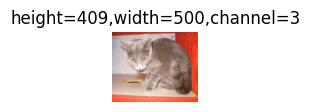

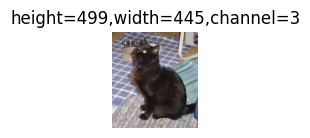

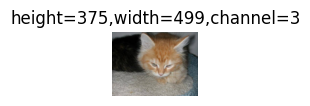

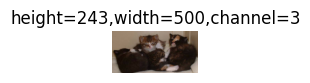

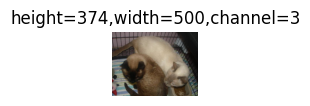

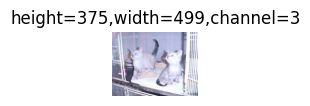

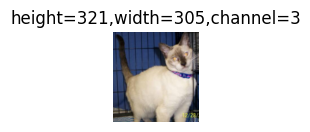

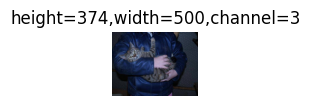

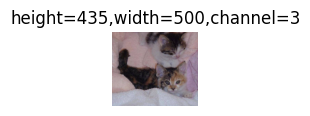

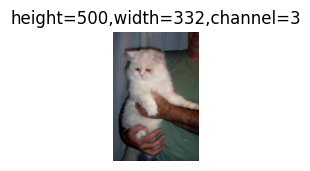

In [56]:
#check the image of cat and dog
plt.figure(figsize=(10,10))
j=0
for i in os.listdir(train_data_cat):
  plt.subplot(2,5,9)
  img=plt.imread(os.path.join(train_data_cat, i)) # Corrected path concatenation
  plt.imshow(img)
  height,width,channel=img.shape
  plt.title(f'height={height},width={width},channel={channel}')
  plt.axis('off')
  plt.show()
  if j==10:
    break
  j+=1

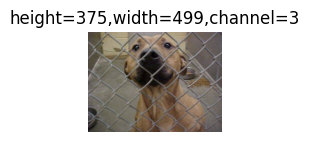

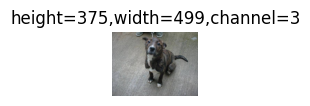

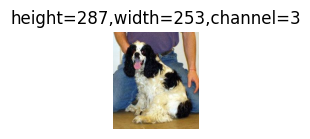

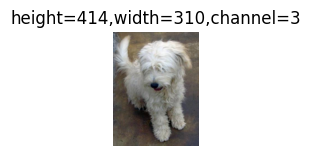

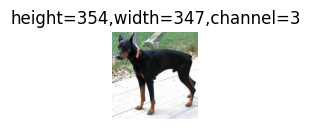

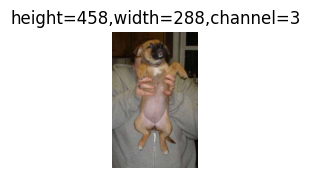

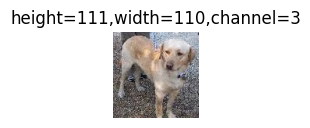

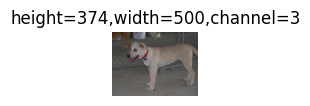

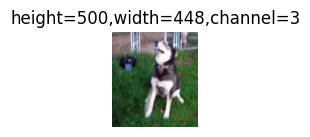

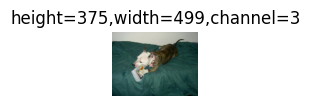

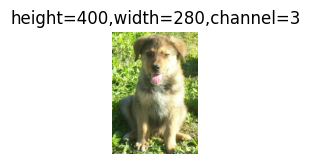

In [57]:
#check the image of cat and dog
plt.figure(figsize=(10,10))
j=0
for i in os.listdir(train_data_dog):
  plt.subplot(2,5,9)
  img=plt.imread(os.path.join(train_data_dog,i)) # Corrected path concatenation
  plt.imshow(img)
  height,width,channel=img.shape
  plt.title(f'height={height},width={width},channel={channel}')
  plt.axis('off')
  plt.show()
  if j==10:
    break
  j+=1

In [58]:
train_image_cat=[]
for i in os.listdir(train_data_cat):
  train_image_cat.append(os.path.join(train_data_cat,i))
train_image_cat

['/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.109.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1094.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1104.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1095.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1114.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1078.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1099.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1079.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1105.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1086.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.1082.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/c

In [59]:
train_image_dog=[]
for i in os.listdir(train_data_dog):
  train_image_dog.append(os.path.join(train_data_dog,i))
train_image_dog

['/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1210.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1189.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1207.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1192.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1217.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1204.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1197.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1214.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.120.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.1215.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.119.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/do

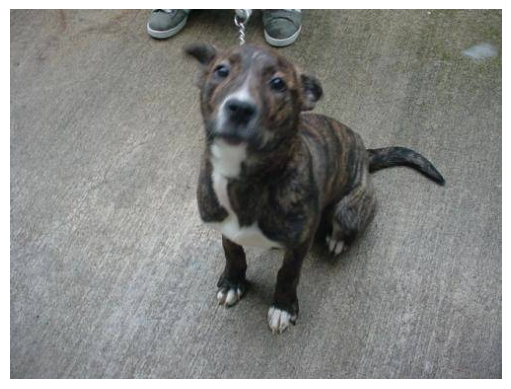

In [60]:
train_image_dog
img=plt.imread(train_image_dog[1])
plt.axis('off')
plt.imshow(img)

In [66]:
train_img=train_image_dog[:800]+train_image_cat[:800]
train_label=label_data_dog[:800]+label_data_cat[:800]

In [67]:
#count of data

print("input count=",len(train_img))
print("label count=",len(train_label))

input count= 1600
label count= 1600


enter the random number 1-563=800


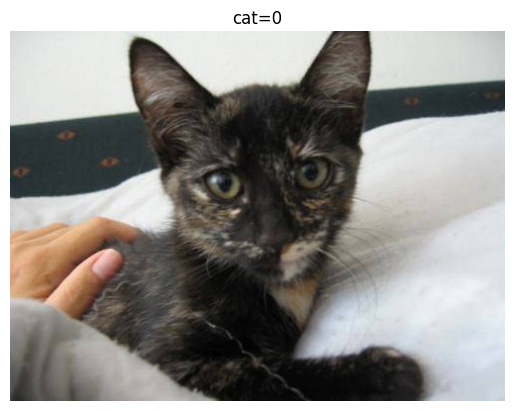

In [68]:
#it is for check whether we given correct label or not
value=int(input("enter the random number 1-563="))
img=plt.imread(train_img[value])
plt.axis('off')
plt.title(f"{'dog' if train_label[value] == 1 else 'cat'}={train_label[value]}")
plt.imshow(img)

array([[[ 57,  63,  74],
        [ 57,  73,  82],
        [ 66,  70,  81],
        ...,
        [ 99,  99, 105],
        [ 81,  79,  85],
        [105,  97, 104]],

       [[ 71,  70,  82],
        [ 61,  73,  83],
        [ 57,  73,  82],
        ...,
        [ 82,  74,  81],
        [ 68,  59,  66],
        [100,  88,  96]],

       [[ 66,  68,  79],
        [ 64,  71,  81],
        [ 52,  70,  79],
        ...,
        [ 95,  86,  93],
        [ 88,  80,  87],
        [ 73,  63,  70]],

       ...,

       [[ 13,   7,  12],
        [ 31,  34,  37],
        [ 37,  47,  49],
        ...,
        [ 91,  89,  91],
        [ 80,  82,  83],
        [ 79,  77,  83]],

       [[ 44,  39,  42],
        [ 45,  46,  45],
        [ 55,  57,  64],
        ...,
        [ 89,  83,  92],
        [ 88,  86,  92],
        [ 83,  81,  87]],

       [[ 51,  46,  48],
        [ 60,  61,  59],
        [ 56,  59,  65],
        ...,
        [ 85,  79,  88],
        [ 80,  77,  84],
        [ 80,  78,  84]]], dtype=uint8)
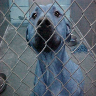

In [69]:
#resize the image 224x224 train_img

resize_train_img=[]

for imgs in train_img:
  img=cv2.imread(imgs)
  if img is not None: # Check if image loaded successfully
    img=cv2.resize(img,(96,96)) # Changed resize dimensions to 80x80
    resize_train_img.append(img)
resize_train_img[0]

In [70]:
resize_train_imgs=[]
for img in resize_train_img:
  resize_train_imgs.append(img.astype('float32')/255)

In [71]:
resize_train_imgs[0]

array([[[0.22352941, 0.24705882, 0.2901961 ],
        [0.22352941, 0.28627452, 0.32156864],
        [0.25882354, 0.27450982, 0.31764707],
        ...,
        [0.3882353 , 0.3882353 , 0.4117647 ],
        [0.31764707, 0.30980393, 0.33333334],
        [0.4117647 , 0.38039216, 0.40784314]],

       [[0.2784314 , 0.27450982, 0.32156864],
        [0.23921569, 0.28627452, 0.3254902 ],
        [0.22352941, 0.28627452, 0.32156864],
        ...,
        [0.32156864, 0.2901961 , 0.31764707],
        [0.26666668, 0.23137255, 0.25882354],
        [0.39215687, 0.34509805, 0.3764706 ]],

       [[0.25882354, 0.26666668, 0.30980393],
        [0.2509804 , 0.2784314 , 0.31764707],
        [0.20392157, 0.27450982, 0.30980393],
        ...,
        [0.37254903, 0.3372549 , 0.3647059 ],
        [0.34509805, 0.3137255 , 0.34117648],
        [0.28627452, 0.24705882, 0.27450982]],

       ...,

       [[0.05098039, 0.02745098, 0.04705882],
        [0.12156863, 0.13333334, 0.14509805],
        [0.14509805, 0

In [72]:
import numpy as np
# Convert the list of preprocessed images to a single numpy array with the correct shape
train_images_np = np.array(resize_train_imgs)

In [73]:
train_images_np[0]

array([[[0.22352941, 0.24705882, 0.2901961 ],
        [0.22352941, 0.28627452, 0.32156864],
        [0.25882354, 0.27450982, 0.31764707],
        ...,
        [0.3882353 , 0.3882353 , 0.4117647 ],
        [0.31764707, 0.30980393, 0.33333334],
        [0.4117647 , 0.38039216, 0.40784314]],

       [[0.2784314 , 0.27450982, 0.32156864],
        [0.23921569, 0.28627452, 0.3254902 ],
        [0.22352941, 0.28627452, 0.32156864],
        ...,
        [0.32156864, 0.2901961 , 0.31764707],
        [0.26666668, 0.23137255, 0.25882354],
        [0.39215687, 0.34509805, 0.3764706 ]],

       [[0.25882354, 0.26666668, 0.30980393],
        [0.2509804 , 0.2784314 , 0.31764707],
        [0.20392157, 0.27450982, 0.30980393],
        ...,
        [0.37254903, 0.3372549 , 0.3647059 ],
        [0.34509805, 0.3137255 , 0.34117648],
        [0.28627452, 0.24705882, 0.27450982]],

       ...,

       [[0.05098039, 0.02745098, 0.04705882],
        [0.12156863, 0.13333334, 0.14509805],
        [0.14509805, 0

In [74]:
data_augumentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [20]:
#creating a cnn
"""
def create_model():
  model = models.Sequential([
      #layer-1
      data_augumentation, # Removed as it's undefined
      #layer1
      layers.Conv2D(64,(3,3),padding='valid',activation='relu',input_shape=(80,80,3)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      #layer3
      layers.Conv2D(64,(3,3),padding='valid',activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      #layer4
      layers.Conv2D(55,(3,3),padding='valid',activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),
      #layer5
      layers.Conv2D(30,(3,3),padding='valid',activation='relu'),
      layers.BatchNormalization(),
      layers.Flatten(),

      #Ann
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(60,activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(15,activation='relu'),
      layers.Dropout(0.6),
      layers.Dense(1,activation='sigmoid') # Changed to 1 unit with sigmoid for binary classification
  ])


  return model
  """

"\ndef create_model():\n  model = models.Sequential([\n      #layer-1\n      data_augumentation, # Removed as it's undefined\n      #layer1\n      layers.Conv2D(64,(3,3),padding='valid',activation='relu',input_shape=(80,80,3)),\n      layers.BatchNormalization(),\n      layers.MaxPooling2D((2,2)),\n      #layer3\n      layers.Conv2D(64,(3,3),padding='valid',activation='relu'),\n      layers.BatchNormalization(),\n      layers.MaxPooling2D((2,2)),\n      #layer4\n      layers.Conv2D(55,(3,3),padding='valid',activation='relu'),\n      layers.BatchNormalization(),\n      layers.MaxPooling2D((2,2)),\n      #layer5\n      layers.Conv2D(30,(3,3),padding='valid',activation='relu'),\n      layers.BatchNormalization(),\n      layers.Flatten(),\n\n      #Ann\n      layers.Dense(128,activation='relu'),\n      layers.Dropout(0.5),\n      layers.Dense(60,activation='relu'),\n      layers.Dropout(0.3),\n      layers.Dense(15,activation='relu'),\n      layers.Dropout(0.6),\n      layers.Dense(1,activ

In [75]:
#creating a cnn

def create_model():
  model = models.Sequential([
      #layer-1
      data_augumentation, # Removed as it's undefined
      #layer1
      layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(96,96,3)),
      layers.Conv2D(64,(3,3),padding='same',activation='relu'),
      layers.MaxPooling2D((2,2)),
      #layer3
      layers.Conv2D(64,(3,3),padding='same',activation='relu'),
      layers.Conv2D(128,(3,3),padding='same',activation='relu'),
      layers.MaxPooling2D((2,2)),
      #layer4
      layers.Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.Conv2D(256, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D((2,2), strides=2),
      layers.Flatten(),

      #Ann
      layers.Dense(1024, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])


  return model

In [76]:
model=create_model()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Changed loss to binary_crossentropy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_learning_rate=callbacks.ReduceLROnPlateau(patience=3,factor=0.02)

In [78]:
history=model.fit(train_images_np, np.array(train_label), epochs=30, validation_split=0.10,callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.5222 - loss: 0.9901 - val_accuracy: 0.0000e+00 - val_loss: 0.8402 - learning_rate: 0.0010
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.5666 - loss: 0.6852 - val_accuracy: 0.0000e+00 - val_loss: 0.7026 - learning_rate: 0.0010
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.5468 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.8023 - learning_rate: 0.0010
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.5693 - loss: 0.6829 - val_accuracy: 0.0000e+00 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.5593 - loss: 0.6828 - val_accuracy: 0.0000e+00 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.5601 - loss: 0.6872 - val_accuracy: 0.0000e+00 - val_loss: 0.8101 - learning_rate: 0.0010
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.5437 

Text(0, 0.5, 'Accuracy')

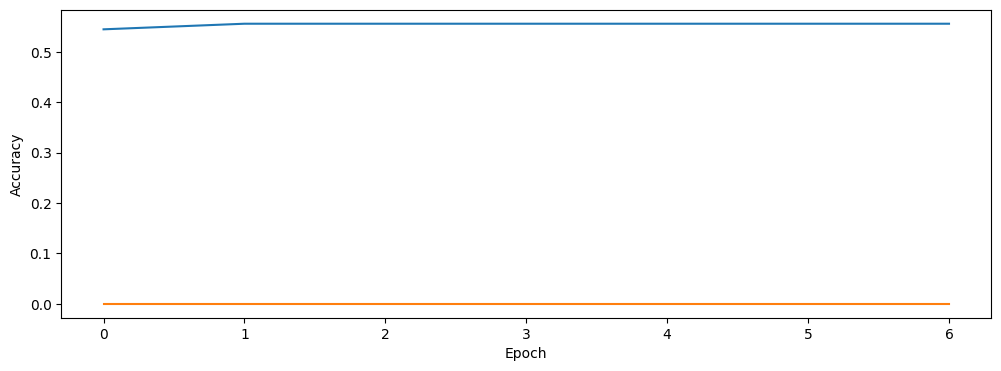

In [79]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

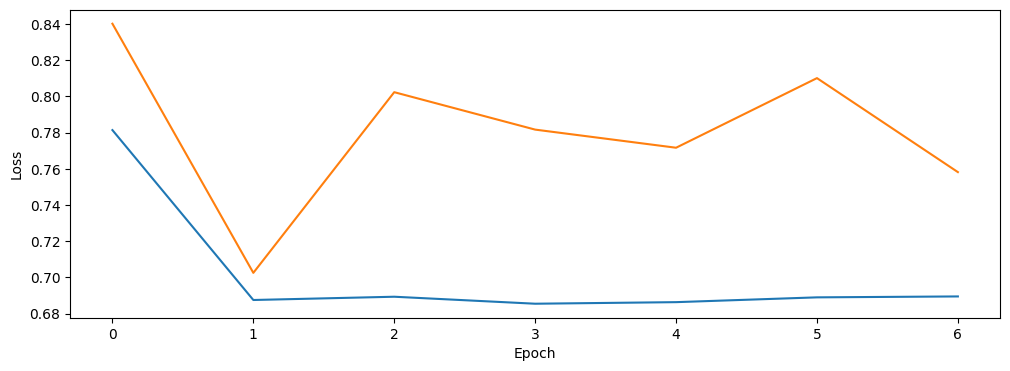

In [80]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [81]:
model.save('mnist_cnn_model.keras')

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
def predict_image(image_path, model):
  img = cv2.imread(image_path) # Reads image as BGR, shape (H, W, 3)
  img = cv2.resize(img, (96,96)) # Correct way to resize with OpenCV, maintains 3 channels
  img_array = img.astype('float32')/255
  img_array = np.expand_dims(img_array, axis=0) # Add batch dimension, shape (1, 80, 80, 3)

  prediction = model.predict(img_array)
  # For binary classification with sigmoid output, prediction is a single probability
  # prediction[0][0] gives the probability of the positive class (dog)
  predicted_class_label = 1 if prediction[0][0] > 0.5 else 0 # Assuming 1 is dog, 0 is cat
  confidence = prediction[0][0]
  return predicted_class_label, confidence

In [83]:
def load_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('/content/mnist_cnn_model.keras')
  predicted_class_label, confidence = predict_image(image_path, loaded_model)

  class_name = 'dog' if predicted_class_label == 1 else 'cat'
  print(f"Predicted class : {class_name}\n")
  print(f"Confidence : {confidence:.2f}\n")

  # Display the image using matplotlib
  # cv2.imread reads as BGR, matplotlib expects RGB. Convert for display.
  img_display = cv2.imread(image_path)
  img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
  plt.imshow(img_display)
  plt.title(f"Predicted: {class_name} (confidence : {confidence:.2f})")
  plt.axis('off')
  plt.show()

In [31]:
# from google.colab import files
# files.upload()

{}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted class : dog

Confidence : 0.50



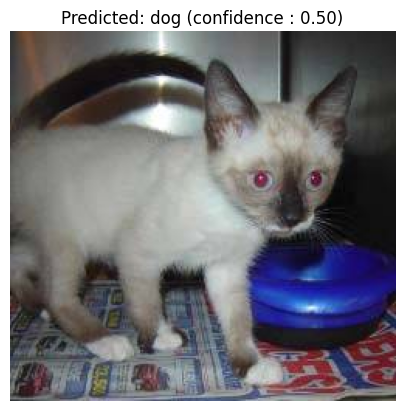

In [96]:

image_path = "/content/cat.909.jpg"
load_and_predict(image_path)

### Preparing the Test Dataset

In [85]:
test_data_cat='/content/drive/MyDrive/new_data_sets/archive/test/cats/'
test_data_dog='/content/drive/MyDrive/new_data_sets/archive/test/dogs/'

In [86]:
test_data_cats=[]
for i in os.listdir(test_data_cat):
  test_data_cats.append(os.path.join(test_data_cat,i))
test_data_cats

test_data_dogs=[]
for i in os.listdir(test_data_dog):
  test_data_dogs.append(os.path.join(test_data_dog,i))
test_data_dogs

label_data_dog=[1]*(len(test_data_dogs))
label_data_cat=[0]*(len(test_data_cats))

test_img=test_data_cats+test_data_dogs
test_label=label_data_cat+label_data_dog

print(len(test_img),len(test_label))

140 140


enter the random number 1-139=55


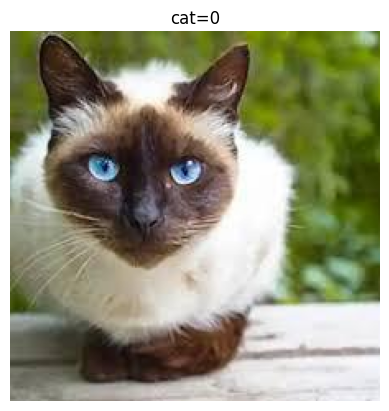

In [87]:
#it is for check whether we given correct label or not
value=int(input("enter the random number 1-139="))
img=plt.imread(test_img[value])
plt.axis('off')
plt.title(f"{'dog' if test_label[value] == 1 else 'cat'}={test_label[value]}")
plt.imshow(img)

In [88]:
resize_test_img=[]
for imgs in test_img:
  img=cv2.imread(imgs)
  img=cv2.resize(img,(96,96))
  resize_test_img.append(img)

resize_test_imgs=[]
for img in resize_test_img:
  resize_test_imgs.append(img.astype('float32')/255)

test_images_np = np.array(resize_test_imgs)
test_labels_np = np.array(test_label)

print("Test images shape:", test_images_np.shape)
print("Test labels shape:", test_labels_np.shape)

Test images shape: (140, 96, 96, 3)
Test labels shape: (140,)


### Evaluating the Model on Test Data

In [89]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images_np, test_labels_np)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 981ms/step - accuracy: 0.2873 - loss: 0.6972

Test Loss: 0.6932
Test Accuracy: 50.0


In [90]:
predictions = model.predict(test_images_np)
predicted_classes = (predictions > 0.5).astype(int) # Convert probabilities to binary class (0 or 1)

print("Confusion Matrix:")
cm = confusion_matrix(test_labels_np, predicted_classes)
TN, FP, FN, TP = cm.ravel() # Flatten the 2x2 matrix to get the individual values in order
print('TN=',TN)
print('FP=',FP)
print('FN=',FN)
print('TP=',TP)

print("\nClassification Report:")
print(classification_report(test_labels_np, predicted_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 700ms/step
Confusion Matrix:
TN= 0
FP= 70
FN= 0
TP= 70

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.50      1.00      0.67        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
